In [6]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold

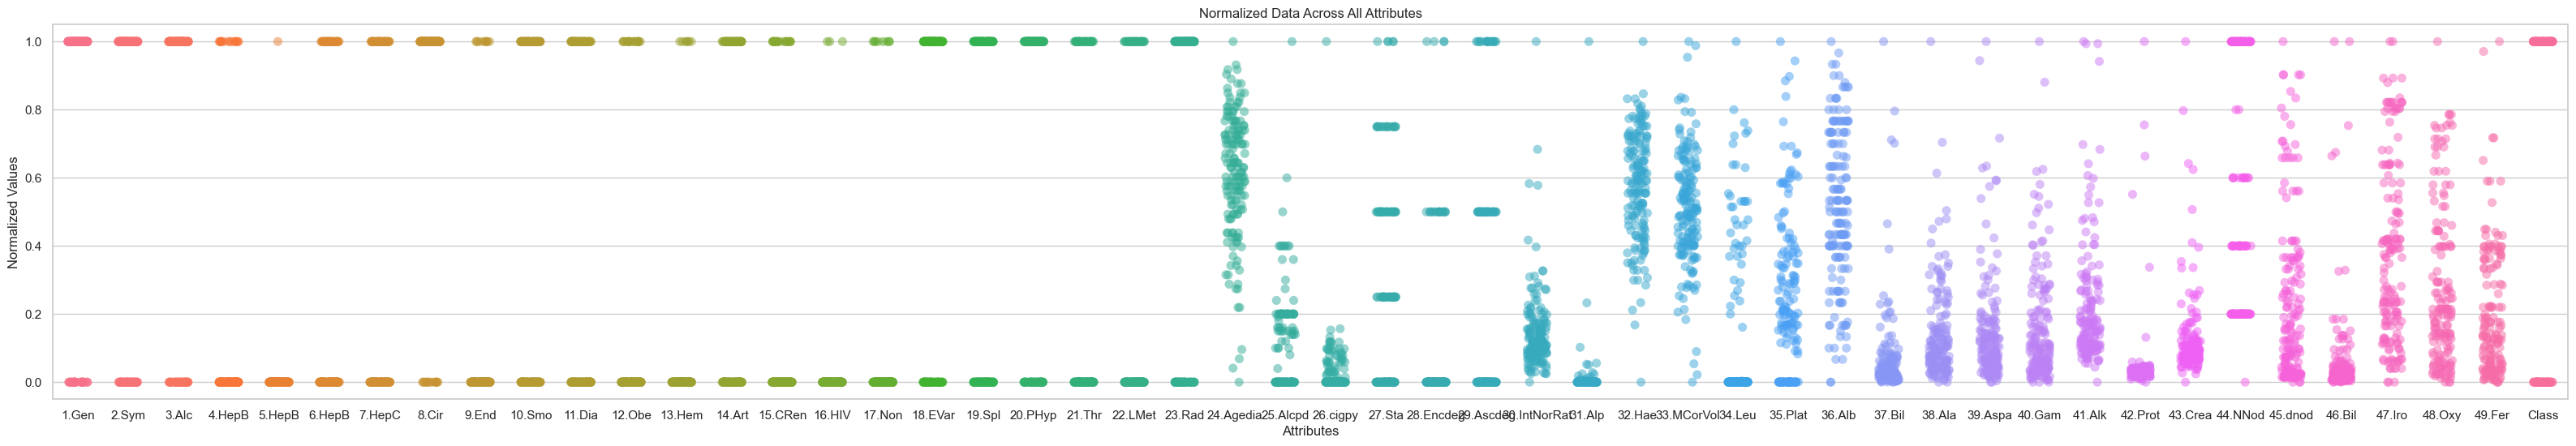

In [7]:
data = 'hcc.csv'
dataHCC = pd.read_csv(data)

dataHCC = dataHCC.apply(lambda x: x.replace('?', np.nan))  # Replacing '?' with NaN
dataHCC = dataHCC.apply(pd.to_numeric, errors='coerce')  # Convert columns to numeric

# KNN imputation
knn_imputer = KNNImputer(n_neighbors=1)
dataHCC_imputed = pd.DataFrame(knn_imputer.fit_transform(dataHCC), columns=dataHCC.columns)
scaler = MinMaxScaler()
scaled_dataHCC = scaler.fit_transform(dataHCC_imputed)
scaled_df = pd.DataFrame(scaled_dataHCC, columns=dataHCC_imputed.columns)

# Verify 0-1 re-scaled features with MinMaxScaler 
sns.set(style="whitegrid")
plt.figure(figsize=(40, 6))
sns.stripplot(data=scaled_df, jitter=0.2, size=8, alpha=0.5)
plt.title('Normalized Data Across All Attributes')
plt.xlabel('Attributes')
plt.ylabel('Normalized Values')
plt.show()

# Classification with all the features
X = scaled_df.iloc[:, 0:48]  
y = scaled_df['Class']

# 10-Fold Cross-Validation
kf = StratifiedKFold(n_splits = 10) 


Feature Importance:
27.Sta          0.379708
32.Hae          0.288347
36.Alb          0.284921
47.Iro          0.273309
29.Ascdeg       0.265674
22.LMet         0.249322
2.Sym           0.247169
41.Alk          0.246998
37.Bil          0.230214
21.Thr          0.219118
30.IntNorRat    0.204879
39.Aspa         0.194893
7.HepC          0.170784
46.Bil          0.158259
28.Encdeg       0.148647
35.Plat         0.148470
40.Gam          0.147621
24.Agedia       0.146054
45.dnod         0.138455
25.Alcpd        0.132162
48.Oxy          0.115545
43.Crea         0.102510
11.Dia          0.100712
5.HepB          0.099359
44.NNod         0.097101
9.End           0.095057
15.CRen         0.090343
34.Leu          0.084605
20.PHyp         0.079388
6.HepB          0.074342
10.Smo          0.071949
14.Art          0.068842
17.Non          0.061247
26.cigpy        0.055417
4.HepB          0.046755
3.Alc           0.040302
1.Gen           0.038435
8.Cir           0.037557
42.Prot         0.034446
33.M

Text(0.5, 1.0, 'Feature Importances')

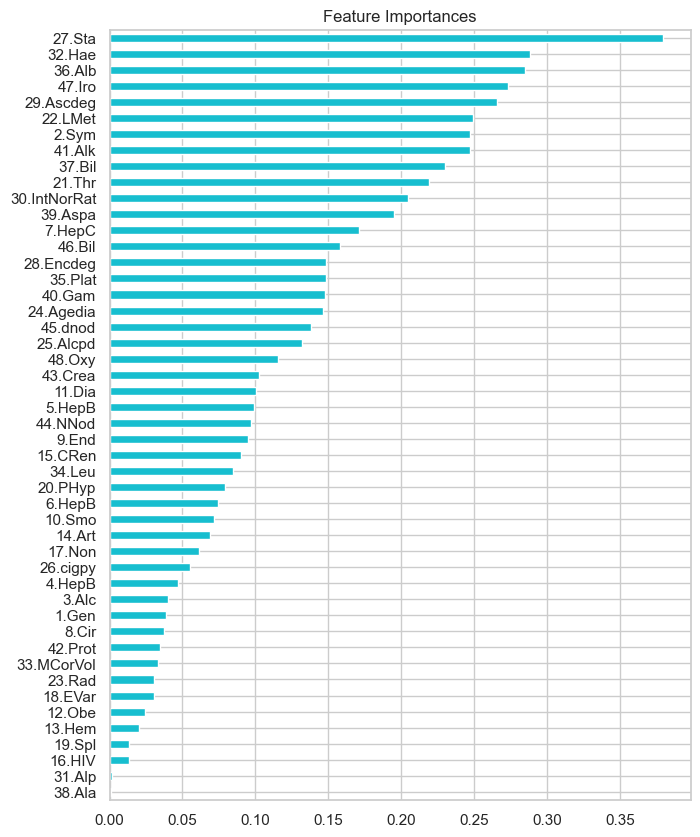

In [8]:
# Features Importance
correlations = X.corrwith(y)
feature_importance = correlations.abs().sort_values(ascending=False)
print("\nFeature Importance:")
print(feature_importance)

# Name of the 12 most important features
top_12_features = feature_importance.head(12).index.tolist()
X_impfeatures=X[top_12_features]

plt.figure(figsize=(7.5,10))
feature_importance.sort_values(ascending=True).plot(kind='barh',color='tab:cyan')
plt.title("Feature Importances")